In [3]:
#coding:utf-8

#==================== Part 0: Basic Function ====================
with open('D:\ex2data1.txt', 'r') as f:  
    data = f.readlines()  #txt中所有字符串读入data  

datamat = []
for line in data:  
    odom = line.strip().split(',')        #将单个数据分隔开存好  
    numbers_float = list(map(float, odom)) #转化为浮点数  py3必须加list
    datamat.append(numbers_float)

#print datamat
import numpy as np

datanp = np.array(datamat)
#print(datanp.shape)
x = datanp[:,(0,1)].reshape((100,2))  
y = datanp[:,2]
x-=x.min()#normalization
x/=x.max()

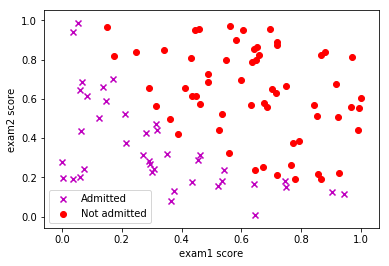

In [4]:
#%% ==================== Part 1: Plotting ====================
#We start the exercise by first plotting the data to understand the the problem we are working with.
import matplotlib.pyplot as plt

def plotData(x,y):
    y=y.reshape((len(y),1))
    fig = plt.figure()  
    ax= fig.add_subplot(111) #使画在一个图上
    
    pos = np.where(y[:,0]==0) #y为类似矩阵形式，所以要再取第一列
    neg = np.where(y[:,0]==1)
    ax1 = plt.scatter(x[pos,0], x[pos,1], marker = 'x', color = 'm')  
    ax2 = plt.scatter(x[neg,0], x[neg,1], marker = 'o', color = 'r')  
    plt.xlabel('exam1 score') 
    plt.ylabel('exam2 score')
    
    plt.legend([ax1, ax2], ['Admitted', 'Not admitted'])
    plt.show()

plotData(x,y)

In [109]:
################# N N ######################
#定义NeuralNetwork 神经网络算法  
class NeuralNetwork:  
    def __init__(self, layers):  
        self.activation = self.logistic  
        self.activation_deriv = self.logistic_derivative
        self.weights = []  
        #权重的初始化  
        for i in range(len(layers) - 1):  
            #对当前神经节点的前驱赋值  
            self.weights.append(np.random.randn(layers[i]+1 , layers[i+1])/np.sqrt(layers[i]+1)) 
        self.weights = np.array(self.weights)
        #print(self.weights)  
        
    def logistic(self,x):  
        return 1/(1 + np.exp(-x))  
  
    def logistic_derivative(self,x):  
        return self.logistic(x)*(1-self.logistic(x))  
    
    #训练函数   ，X矩阵，每行是一个实例 ，y是每个实例对应的结果，learning_rate 学习率，   
    # epochs，表示抽样的方法对神经网络进行更新的最大次数  
    def fit(self, X, y, learning_rate=0.01, iterations=3000):  
        X = np.hstack((np.ones((X.shape[0],1)),X))
        y = np.array(y) 
        
        global J_history
        J_history=[]
        for k in range(iterations):  
            #随机选取一行，对神经网络进行更新  
            i = np.random.randint(X.shape[0])   
            a = [X[i]]   #每一层的z值
  
            #完成所有正向的更新  
            for l in range(len(self.weights)):
                if l == len(self.weights)-1:
                    a.append(self.activation(np.dot(a[l], self.weights[l])))
                else:
                    a.append(np.hstack((np.ones(1),self.activation(np.dot(a[l], self.weights[l])))))
            a=np.array(a)

            ##########开始反向计算误差， ###########
            J = -(y[i]*np.log(a[-1])+(1-y[i])*np.log(1-a[-1]))
            J_history.append(J)
            
            grad2= (a[-1]-y[i])*a[-2] # *为element-wise乘

            '''
            #梯度检验没问题
            print(np.sum(grad2))
            eps = 0.0001
            w1=self.weights[1]+eps
            w2=self.weights[1]-eps
            new_a1 = self.activation(np.dot(a[1], w1))
            new_a2 = self.activation(np.dot(a[1], w2))
            grad2Approx = ( -(y[i]*np.log(new_a1)+(1-y[i])*np.log(1-new_a1))+(y[i]*np.log(new_a2)+(1-y[i])*np.log(1-new_a2)))/(2*eps)
            print(grad2Approx)
            '''

            grad1 = np.zeros((len(a[0]),len(a[1])-1))
            
            for ii in range(len(a[0])):
                for jj in range(1,len(a[1])):
                    grad1[ii][jj-1] = (a[-1]-y[ii])*self.weights[1][jj]*a[1][jj]*(1-a[1][jj])*a[0][ii]
            #更新w
            grad2 = grad2.reshape(self.weights[1].shape)
            self.weights[0] -= learning_rate*grad1
            self.weights[1] -= learning_rate*grad2
            
    def predict(self,x):
        a1=np.hstack((np.ones((x.shape[0],1)),x))
        a2=np.hstack((np.ones((x.shape[0],1)),self.activation(a1.dot(self.weights[0]))))
        pre_y = self.activation(a2.dot(self.weights[1]))
        return pre_y

In [112]:
nn =NeuralNetwork([2,3,1])  

print('Start fitting...')
nn.fit(x,y)  

#print(nn.weights)
print(nn.predict(x[:5,:]))
#print(y[:5])

Start fitting...
[[ 0.5949119 ]
 [ 0.58791779]
 [ 0.59300019]
 [ 0.58651685]
 [ 0.57618863]]


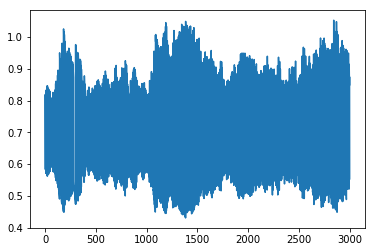

In [113]:
####J
import matplotlib.pyplot as plt  
fig = plt.figure() 
y_plot = J_history
x_plot = np.arange(1,len(y_plot)+1,1)
plt.plot(x_plot,y_plot)
plt.show()

J根本不收敛，不知道问题出现在哪，因为原理感觉理解了，代码也都是亲自写的...
先放在这吧。